# PCA 

Putting together a more complete demonstration of PCA compared to the vast majority of the tutorials out there that just seem to copy each other.

In [19]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data for this exercise
from sklearn.datasets import load_breast_cancer

# Seaborn settings
sns.set_style("whitegrid")


In [2]:
# Load data
breast_data = load_breast_cancer().data
breast_labels = load_breast_cancer().target
features = load_breast_cancer().feature_names
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
dataset = pd.DataFrame(final_breast_data)
features_labels = np.append(features,'label')
dataset.columns = features_labels
dataset['label'].replace(0, 'Benign',inplace=True)
dataset['label'].replace(1, 'Malignant',inplace=True)


In [4]:
# Now for actual PCA...
# Scale the data
X = dataset.loc[:, features].values

scaler = StandardScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)


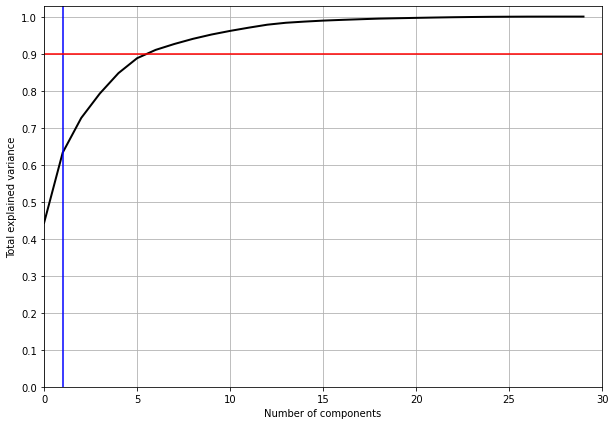

In [5]:
# How many components?
pca_full = PCA().fit(scaled_X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 30)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(1, c='b')
plt.axhline(0.9, c='r')
plt.grid()
plt.show()

In [ ]:
sns.relplot()

In [6]:
# Let's start with 2 components, explains about ~65%

pca = PCA(n_components=2)
pca.fit(scaled_X)
X_new = pca.transform(scaled_X)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explained variationt: {}'.format(np.sum(pca.explained_variance_ratio_)))


Explained variation per principal component: [0.44272026 0.18971182]
Total explained variationt: 0.6324320765155942


In [13]:
# PCA Score Plot

# Make the dataframe
pc_df = pd.DataFrame(data = X_new, columns=['PC1', 'PC2'])
pc_df['label'] = dataset['label']
pc_df.head()

,PC1,PC2,label
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


<Figure size 1440x1080 with 0 Axes>

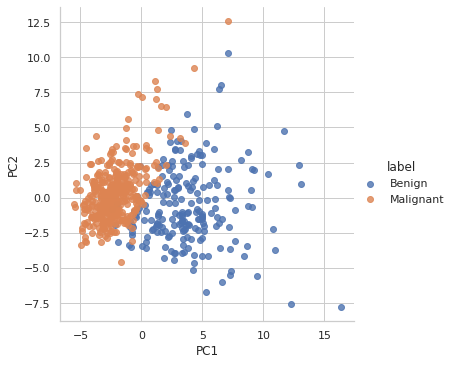

In [25]:
# Make the plot
plt.figure(figsize=(20,15))

sns.lmplot(x='PC1', y='PC2',
data=pc_df,
fit_reg=False,
hue='label',
legend=True);

In [12]:
# Most important features
print(abs( pca.components_ ))

[[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
  0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
  0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
  0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
  0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
 [0.23385713 0.05970609 0.21518136 0.23107671 0.18611302 0.15189161
  0.06016536 0.0347675  0.19034877 0.36657547 0.10555215 0.08997968
  0.08945723 0.15229263 0.20443045 0.2327159  0.19720728 0.13032156
  0.183848   0.28009203 0.21986638 0.0454673  0.19987843 0.21935186
  0.17230435 0.14359317 0.09796411 0.00825724 0.14188335 0.27533947]]


In [33]:
# Number of components
number_pcs = pca.components_.shape[0]

top_features = [np.abs(pca.components_[i]).argmax() for i in range(number_pcs)]
top_features_names = [dataset.columns[top_features[i]] for i in range(number_pcs)]

dic = {'PC{}'.format(i + 1): top_features_names[i] for i in range(number_pcs)}

df = pd.DataFrame(dic.items(), columns=['PC', 'Top Feature'])
df


,PC,Top Feature
0,PC1,mean concave points
1,PC2,mean fractal dimension


In [37]:
# Scores and things

ss = np.sum((scaled_X - np.mean(scaled_X, 0)) ** 2)
predicted = pca.inverse_transform(X_new)
rss = np.sum((scaled_X - predicted) ** 2)

# Variance explained by the model
r2x = 1 - (rss / ss)

r2x

0.6324320765155944

In [ ]:
# dmodx

